<a href="https://colab.research.google.com/github/andssuu/Monclass/blob/main/notebooks/cnn_conv1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas

In [ ]:
!pip install --user tensorflow-addons
# restart runtime
import os
os.kill(os.getpid(), 9)

     |████████████████████████████████| 1.1 MB 12.2 MB/s 


In [1]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
plt.style.use('default')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn import metrics

import tensorflow_addons as tfa

from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Reshape, BatchNormalization, Dropout, LayerNormalization, Activation, Input, ReLU, Add, DepthwiseConv2D, Conv1D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
from tensorflow.keras import initializers
from tensorflow import Tensor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.initializers import glorot_uniform

# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from collections import Counter

seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Leitura dos dados

In [2]:
!git clone https://github.com/andssuu/Monclass.git

Cloning into 'Monclass'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [5]:
df = pd.read_csv("Monclass/data/dataset_6.csv", float_precision='high')
df_data = df.loc[:, ['acc_x', 'acc_y', 'acc_z', 'gir_x', 'gir_y', 'gir_z', 'mag_x', 'mag_y', 'mag_z', 'displacement_speed', 'label']]
df_data

,acc_x,acc_y,acc_z,gir_x,gir_y,gir_z,mag_x,mag_y,mag_z,displacement_speed,label
0,1157,9002,-12840,243,195,-466,-460,1575,-205,0.0,Standing-Ruminating
1,1226,9986,-12546,-492,2209,-2189,-463,1585,-264,0.0,Standing-Ruminating
2,870,8224,-13117,590,-712,179,-527,1537,-248,0.0,Standing-Ruminating
3,2024,9428,-12521,212,662,-893,-515,1544,-226,0.0,Standing-Ruminating
4,1698,8163,-12980,1409,81,826,-501,1553,-281,0.0,Standing-Ruminating
...,...,...,...,...,...,...,...,...,...,...,...
13083,-1776,3679,-8874,-1623,-1838,-7536,615,1048,-310,0.0,Grazing
13084,3468,14178,-12207,-3882,7653,2397,299,-25,-1089,0.0,Grazing
13085,-6229,11638,-11286,1982,-1144,359,-1047,1164,599,0.0,Grazing
13086,-2267,12908,-7665,2458,-1275,-1757,-1498,940,223,0.0,Grazing


# Bases de treino e teste

In [ ]:
data_train, data_test=train_test_split(df_data, test_size=0.4, random_state=seed, shuffle=True, stratify=df_data.iloc[:, -1])

In [ ]:
data_train

,acc_x,acc_y,acc_z,gir_x,gir_y,gir_z,mag_x,mag_y,mag_z,displacement_speed,label
10593,-3781,6323,-14823,-5178,3174,-4355,-1177,-963,-778,0.0,Grazing
10607,-9618,5218,-17565,979,-3480,-1579,-1525,488,-466,0.0,Grazing
5513,8198,7837,-10911,89,-476,435,622,1581,-133,0.0,Lying-Resting
7409,5669,9578,-10537,-15,829,228,-1294,575,-778,0.0,Standing-Resting
11496,7453,8638,-9878,-484,-279,-231,-56,1253,335,0.0,Lying-Ruminating
...,...,...,...,...,...,...,...,...,...,...,...
7986,-99,6331,-10122,1583,-1869,5249,565,1452,471,0.0,Grazing
10224,3560,6897,-12803,-319,-2761,1407,-1196,929,-329,0.0,Standing-Resting
10671,4977,5625,-12693,-354,-1048,2737,959,383,34,0.0,Standing-Resting
2920,-6881,8271,-12151,-4091,1568,-4644,-56,1634,-442,0.0,Grazing


In [ ]:
data_test

,acc_x,acc_y,acc_z,gir_x,gir_y,gir_z,mag_x,mag_y,mag_z,displacement_speed,label
6079,-9709,2472,-13050,4394,-4682,1981,230,-13,-1072,0.0,Grazing
12299,-8983,3850,-11179,2016,440,-557,-376,-587,-1148,0.0,Grazing
3339,-2612,6695,-13788,2556,-2429,640,656,2161,-91,0.0,Grazing
1947,3586,10758,-11444,-368,-693,1883,231,-81,-1384,0.0,Standing-Resting
795,-7252,9726,-8760,590,-5826,-223,-1117,901,-21,0.0,Grazing
...,...,...,...,...,...,...,...,...,...,...,...
381,7642,9988,-10307,-551,-411,508,-602,581,-1336,0.0,Lying-Ruminating
948,-7592,2719,-9041,-769,1689,-2327,-841,1042,425,0.0,Grazing
2198,-5631,8943,-8975,-3823,1445,-2826,176,1465,-985,0.0,Grazing
4352,4480,10633,-10761,-810,238,-323,1647,95,-751,0.0,Standing-Ruminating


## Quantidade total de amostras na base completa

In [ ]:
df_data['label'].value_counts()

Grazing                5732
Lying-Ruminating       2034
Lying-Resting          1702
Standing-Resting       1559
Walking                1229
Standing-Ruminating     832
Name: label, dtype: int64

## Quantidade total de amostras na base de treino

In [ ]:
data_train['label'].value_counts()

Grazing                3439
Lying-Ruminating       1220
Lying-Resting          1021
Standing-Resting        935
Walking                 738
Standing-Ruminating     499
Name: label, dtype: int64

## Quantidade total de amostras na base de teste

In [ ]:
data_test['label'].value_counts()

Grazing                2293
Lying-Ruminating        814
Lying-Resting           681
Standing-Resting        624
Walking                 491
Standing-Ruminating     333
Name: label, dtype: int64

## Formatação dos tensores

In [ ]:
labels_map={"Grazing": 0, "Lying-Ruminating": 1, "Lying-Resting": 2, "Standing-Resting": 3, "Walking": 4, "Standing-Ruminating": 5}
r_reshape, c_reshape = 1, 10

# normalizaçao dos dados da base original
_data_train, _data_test = data_train.copy(), data_test.copy()
_mean = _data_train.iloc[:, :-1].mean()
_std = _data_test.iloc[:, :-1].std()
_data_train.iloc[:, :-1] = (_data_train.iloc[:, :-1] - _mean) / _std
_data_test.iloc[:, :-1] = (_data_test.iloc[:, :-1] - _mean) / _std

# reshape data to fit model
t_data_train = _data_train.iloc[:, :-1].values.reshape(_data_train.shape[0], r_reshape, c_reshape, 1)
t_data_test = _data_test.iloc[:, :-1].values.reshape(_data_test.shape[0], r_reshape, c_reshape, 1)
print(t_data_train.shape, t_data_test.shape)

_labels_train = np.array(list(map(lambda x: labels_map[x], data_train.iloc[:, -1])))
c_labels_train = to_categorical(_labels_train)

_labels_test = np.array(list(map(lambda x: labels_map[x], data_test.iloc[:, -1])))
c_labels_test = to_categorical(_labels_test)

(7852, 1, 10, 1) (5236, 1, 10, 1)


### Reamostragem BOOTSTRAP

In [ ]:
# BOOTSTRAP
_data=data_train.copy()
count_class_0, count_class_1, count_class_2, count_class_3, count_class_4, count_class_5 = _data['label'].value_counts()
# print(count_class_0, count_class_1, count_class_2, count_class_3)

df_class_0=_data[_data['label']=='Grazing']
df_class_1=_data[_data['label']=='Lying-Ruminating']
df_class_2=_data[_data['label']=='Standing-Ruminating']
df_class_3=_data[_data['label']=='Standing-Resting']
df_class_4=_data[_data['label']=='Walking']
df_class_5=_data[_data['label']=='Standing-Ruminating']

df_class_1_under=df_class_1.sample(count_class_0, replace=True, random_state=seed)
df_class_2_under=df_class_2.sample(count_class_0, replace=True, random_state=seed)
df_class_3_under=df_class_3.sample(count_class_0, replace=True, random_state=seed)
df_class_4_under=df_class_4.sample(count_class_0, replace=True, random_state=seed)
df_class_5_under=df_class_5.sample(count_class_0, replace=True, random_state=seed)

data_balanced_bootstrap=pd.concat([df_class_0, df_class_1_under, df_class_2_under, df_class_3_under, df_class_4_under, df_class_5_under], axis=0).reset_index(drop=True)
_mean = data_balanced_bootstrap.iloc[:, :-1].mean()
_std = data_balanced_bootstrap.iloc[:, :-1].std()
data_balanced_bootstrap.iloc[:, :-1] = (data_balanced_bootstrap.iloc[:, :-1] - _mean) / _std
_shuffle_bootstrap=np.random.RandomState(seed=seed).permutation(len(data_balanced_bootstrap))
t_data_train_balanced_bootstrap=data_balanced_bootstrap.iloc[:, :-1].values[_shuffle_bootstrap].reshape(data_balanced_bootstrap.shape[0], r_reshape, c_reshape, 1)
labels_train_balanced_bootstrap=np.array(list(map(lambda x: labels_map[x], data_balanced_bootstrap.iloc[:, -1].values[_shuffle_bootstrap])))
c_labels_train_balanced_bootstrap=to_categorical(labels_train_balanced_bootstrap)

data_test_bootstrap = data_test.copy()
data_test_bootstrap.iloc[:, :-1] = (data_test_bootstrap.iloc[:, :-1] - _mean) / _std
t_data_test_bootstrap = data_test_bootstrap.iloc[:, :-1].values.reshape(data_test_bootstrap.shape[0], r_reshape, c_reshape, 1)

print(t_data_train_balanced_bootstrap.shape, c_labels_train_balanced_bootstrap.shape, t_data_test_bootstrap.shape, c_labels_test.shape)

(20634, 1, 10, 1) (20634, 6) (5236, 1, 10, 1) (5236, 6)


### Reamostragem SMOTE

(20634, 1, 10, 1) (20634, 6) (5236, 1, 10, 1) (5236, 6)
label              
Grazing                3439
Lying-Resting          3439
Lying-Ruminating       3439
Standing-Resting       3439
Standing-Ruminating    3439
Walking                3439
dtype: int64


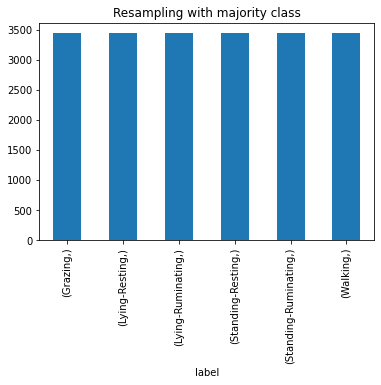

In [ ]:
# SMOTE
_data = data_train.copy()
smote = SMOTE(sampling_strategy='not majority', random_state=seed, k_neighbors=5)
data_balanced_smote, _label_balanced_smote = smote.fit_resample(_data.iloc[:, :-1].values, _data.iloc[:, -1].values)
_shuffle_smote = np.random.RandomState(seed=seed).permutation(len(data_balanced_smote))

data_balanced_smote = pd.DataFrame(data_balanced_smote[_shuffle_smote], columns=data_train.columns[:-1])
_mean = data_balanced_smote.mean()
_std = data_balanced_smote.std()
data_balanced_smote = (data_balanced_smote- _mean) / _std

t_data_train_balanced_smote = data_balanced_smote.values.reshape(data_balanced_smote.shape[0], r_reshape, c_reshape, 1)
label_balanced_smote = np.array(list(map(lambda x: labels_map[x], _label_balanced_smote[_shuffle_smote])))
c_labels_train_balanced_smote = to_categorical(label_balanced_smote)

data_test_smote = data_test.copy()
data_test_smote.iloc[:, :-1] = (data_test_smote.iloc[:, :-1] - _mean) / _std
t_data_test_smote = data_test_smote.iloc[:, :-1].values.reshape(data_test_smote.shape[0], r_reshape, c_reshape, 1)

print(t_data_train_balanced_smote.shape, c_labels_train_balanced_smote.shape, t_data_test_smote.shape, c_labels_test.shape)
_l = pd.DataFrame(_label_balanced_smote, columns=['label'])
print(_l.value_counts())
_l.value_counts().plot(kind='bar', title='Resampling with majority class')

### Visualização dos inputs

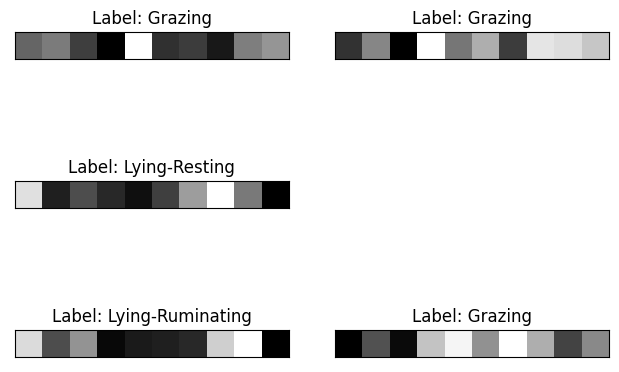

In [ ]:
plt.style.use('default')
fig = plt.figure()
for i in range(6):
  plt.subplot(3, 2, i+1)
  plt.tight_layout()
  plt.imshow(t_data_train[i].reshape(r_reshape, c_reshape), cmap='gray', interpolation='none')
  plt.title("Label: {}".format(list(labels_map.keys())[list(labels_map.values()).index(argmax(c_labels_train[i]))]))
  plt.xticks([])
  plt.yticks([])

Text(0.5, 1.0, 'Grazing')

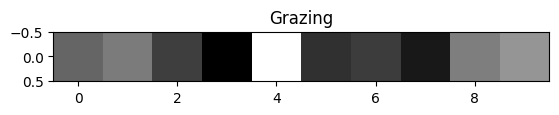

In [ ]:
plt.style.use('default')
plt.imshow(t_data_train[0].reshape(r_reshape, c_reshape), cmap='gray')
plt.title(list(labels_map.keys())[list(labels_map.values()).index(argmax(c_labels_train[0]))])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


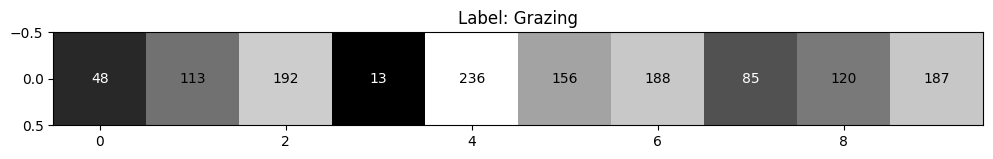

In [ ]:
def visualize_input(window, ax): 
    window = window * 255
    img = np.uint8(window)
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            #ax.annotate(str(round(img[x][y],2)), xy=(y,x),
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
plt.style.use('default')
fig = plt.figure(figsize = (12,12))
plt.title('Label: {}'.format(list(labels_map.keys())[list(labels_map.values()).index(argmax(c_labels_train[0]))]))
ax=fig.add_subplot(111)
visualize_input(t_data_train[0].reshape(r_reshape, c_reshape), ax)

# CNN INICIAL - HOLDOUT VALIDATION

In [ ]:
epochs=100
batch_size=64
feature_dimensions=1024
input_shape=(1, 10, 1)
n_classes=6
labels_map={"Grazing": 0, "Lying-Ruminating": 1, "Lying-Resting": 2, "Standing-Resting": 3, "Walking": 4, "Standing-Ruminating": 5}

def create_cnn():
    model = Sequential([
        Conv1D(32, kernel_size=10, input_shape=input_shape, activation='relu', padding='same', kernel_initializer=initializers.glorot_uniform(seed=seed)),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),
        Conv1D(96, kernel_size=5, activation='relu', padding='same', kernel_initializer=initializers.glorot_uniform(seed=seed)),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),
        Flatten(),
        Dense(384, activation='relu', kernel_initializer=initializers.glorot_uniform(seed=seed)),
        Dense(128, activation='relu', kernel_initializer=initializers.glorot_uniform(seed=seed)),
        Dense(n_classes, activation='softmax', kernel_initializer=initializers.glorot_uniform(seed=seed))
    ])
    model.reset_metrics()
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc', tfa.metrics.F1Score(num_classes=n_classes, name='f1_score', average='macro')])
    return model

def show_classification_report(results, n_splits):
    print('''\t\t        precision      recall     f1-score\n
        Grazing          {:.2f}        {:.2f}      {:.2f}
        Lying-Ruminating {:.2f}        {:.2f}      {:.2f}
        Standing-Ruminating    {:.2f}        {:.2f}      {:.2f}
        Standing-Resting       {:.2f}        {:.2f}      {:.2f}
        Walking           {:.2f}        {:.2f}      {:.2f}
        Standing-Ruminating    {:.2f}        {:.2f}      {:.2f}
        macro avg         {:.2f}        {:.2f}      {:.2f}
        accuracy          {:.2f}
    '''.format(
        100*results['Grazing']['precision']/n_splits, 100*results['Grazing']['recall']/n_splits, 100*results['Grazing']['f1-score']/n_splits,
        100*results['Lying-Ruminating']['precision']/n_splits, 100*results['Lying-Ruminating']['recall']/n_splits, 100*results['Lying-Ruminating']['f1-score']/n_splits,
        100*results['Standing-Ruminating']['precision']/n_splits, 100*results['Standing-Ruminating']['recall']/n_splits, 100*results['Standing-Ruminating']['f1-score']/n_splits,
        100*results['Standing-Resting']['precision']/n_splits, 100*results['Standing-Resting']['recall']/n_splits, 100*results['Standing-Resting']['f1-score']/n_splits,
        100*results['Walking']['precision']/n_splits, 100*results['Walking']['recall']/n_splits, 100*results['Walking']['f1-score']/n_splits,
        100*results['Standing-Ruminating']['precision']/n_splits, 100*results['Standing-Ruminating']['recall']/n_splits, 100*results['Standing-Ruminating']['f1-score']/n_splits,
        100*results['macro avg']['precision']/n_splits, 100*results['macro avg']['recall']/n_splits, 100*results['macro avg']['f1-score']/n_splits,
        100*results['accuracy']/n_splits
        )
    )

def update_report(results, new_results):
    for k in new_results.keys():
        if type(new_results[k]) is dict:
            for _k in results[k].keys():
                results[k][_k]+=new_results[k][_k]
        else:
            results[k] += new_results[k]
create_cnn().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 10, 32)         352       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 5, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 5, 96)          15456     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 3, 96)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 384)               1

## Base original

In [ ]:
# ORIGINAL
cnn_model=create_cnn()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='val_f1_score', mode='max')
hist=cnn_model.fit(t_data_train, c_labels_train, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                validation_split=0.2,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
99/99 [==============================] - 4s 9ms/step - loss: 0.9612 - acc: 0.6378 - f1_score: 0.4479 - val_loss: 0.6710 - val_acc: 0.7307 - val_f1_score: 0.5741
Epoch 2/100
99/99 [==============================] - 1s 5ms/step - loss: 0.6304 - acc: 0.7562 - f1_score: 0.6265 - val_loss: 0.5925 - val_acc: 0.7677 - val_f1_score: 0.6394
Epoch 3/100
99/99 [==============================] - 1s 6ms/step - loss: 0.5584 - acc: 0.7849 - f1_score: 0.6817 - val_loss: 0.5958 - val_acc: 0.7950 - val_f1_score: 0.7119
Epoch 4/100
99/99 [==============================] - 0s 5ms/step - loss: 0.5001 - acc: 0.8088 - f1_score: 0.7268 - val_loss: 0.5964 - val_acc: 0.7829 - val_f1_score: 0.6927
Epoch 5/100
99/99 [==============================] - 0s 5ms/step - loss: 0.4726 - acc: 0.8161 - f1_score: 0.7388 - val_loss: 0.5619 - val_acc: 0.7785 - val_f1_score: 0.6967
Epoch 6/100
99/99 [==============================] - 0s 5ms/step - loss: 0.4381 - acc: 0.8378 - f1_score: 0.7697 - val_los

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2179,1,18,29,56,10
Lying-Ruminating,4,721,67,14,1,7
Lying-Resting,17,96,537,27,1,3
Standing-Resting,42,49,26,442,2,63
Walking,26,0,2,0,461,2
Standing-Ruminating,10,31,9,87,5,191


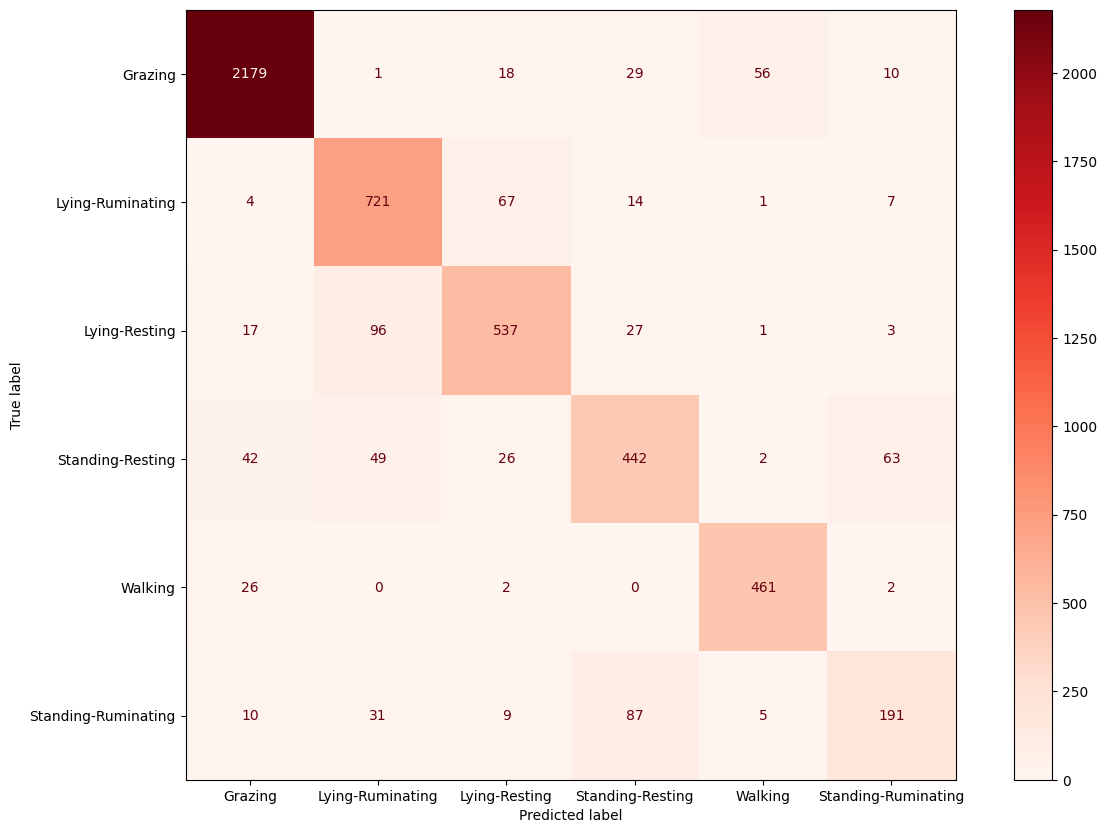

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_map)
disp.plot(ax=ax, cmap="Reds", values_format='')

### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9565    0.9503    0.9534      2293
   Lying-Ruminating     0.8029    0.8857    0.8423       814
      Lying-Resting     0.8149    0.7885    0.8015       681
   Standing-Resting     0.7379    0.7083    0.7228       624
            Walking     0.8764    0.9389    0.9066       491
Standing-Ruminating     0.6920    0.5736    0.6273       333

           accuracy                         0.8654      5236
          macro avg     0.8134    0.8076    0.8090      5236
       weighted avg     0.8638    0.8654    0.8638      5236



### Gráfico de métricas

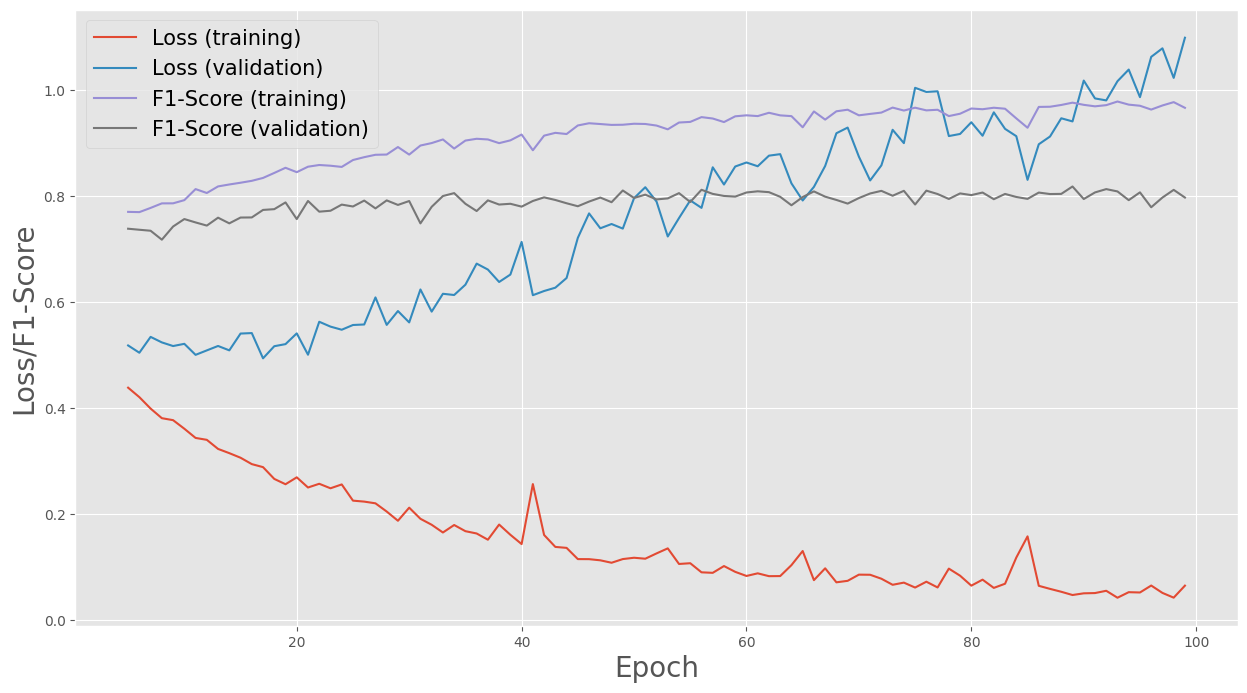

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["val_loss"][5:], label="Loss (validation)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["val_f1_score"][5:], label="F1-Score (validation)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

# CNN OTIMIZADA

In [ ]:
epochs=100
batch_size=64
input_shape=(1, 10, 1)
n_classes=6
labels_map={"Grazing": 0, "Lying-Ruminating": 1, "Lying-Resting": 2, "Standing-Resting": 3, "Walking": 4, "Standing-Ruminating": 5}

def create_cnn():
    model = Sequential([
        Conv1D(32, kernel_size=10, input_shape=input_shape, activation='relu', padding='same', kernel_initializer=initializers.glorot_uniform(seed=seed)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),
        Dropout(0.2, seed=seed),
        Conv1D(96, kernel_size=5, activation='relu', padding='same', kernel_initializer=initializers.glorot_uniform(seed=seed)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),
        Dropout(0.2, seed=seed),
        Flatten(),
        Dense(384, activation='relu', kernel_regularizer=regularizers.l1(0.01), kernel_initializer=initializers.glorot_uniform(seed=seed)),
        BatchNormalization(),
        Dropout(0.2, seed=seed),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01), kernel_initializer=initializers.glorot_uniform(seed=seed)),
        BatchNormalization(),
        Dropout(0.2, seed=seed),
        Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.01), kernel_initializer=initializers.glorot_uniform(seed=seed))
    ])
    model.reset_metrics()
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc', tfa.metrics.F1Score(num_classes=n_classes, name='f1_score', average='macro')])
    return model

def show_classification_report(results, n_splits):
    print('''\t\t        precision      recall     f1-score\n
        Grazing          {:.2f}        {:.2f}      {:.2f}
        Lying-Ruminating {:.2f}        {:.2f}      {:.2f}
        Standing-Ruminating    {:.2f}        {:.2f}      {:.2f}
        Standing-Resting       {:.2f}        {:.2f}      {:.2f}
        Walking           {:.2f}        {:.2f}      {:.2f}
        Standing-Ruminating    {:.2f}        {:.2f}      {:.2f}
        macro avg         {:.2f}        {:.2f}      {:.2f}
        accuracy          {:.2f}
    '''.format(
        100*results['Grazing']['precision']/n_splits, 100*results['Grazing']['recall']/n_splits, 100*results['Grazing']['f1-score']/n_splits,
        100*results['Lying-Ruminating']['precision']/n_splits, 100*results['Lying-Ruminating']['recall']/n_splits, 100*results['Lying-Ruminating']['f1-score']/n_splits,
        100*results['Standing-Ruminating']['precision']/n_splits, 100*results['Standing-Ruminating']['recall']/n_splits, 100*results['Standing-Ruminating']['f1-score']/n_splits,
        100*results['Standing-Resting']['precision']/n_splits, 100*results['Standing-Resting']['recall']/n_splits, 100*results['Standing-Resting']['f1-score']/n_splits,
        100*results['Walking']['precision']/n_splits, 100*results['Walking']['recall']/n_splits, 100*results['Walking']['f1-score']/n_splits,
        100*results['Standing-Ruminating']['precision']/n_splits, 100*results['Standing-Ruminating']['recall']/n_splits, 100*results['Standing-Ruminating']['f1-score']/n_splits,
        100*results['macro avg']['precision']/n_splits, 100*results['macro avg']['recall']/n_splits, 100*results['macro avg']['f1-score']/n_splits,
        100*results['accuracy']/n_splits
        )
    )

def update_report(results, new_results):
    for k in new_results.keys():
        if type(new_results[k]) is dict:
            for _k in results[k].keys():
                results[k][_k]+=new_results[k][_k]
        else:
            results[k] += new_results[k]
create_cnn().summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 1, 10, 32)         352       
                                                                 
 batch_normalization (BatchN  (None, 1, 10, 32)        128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 1, 5, 32)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 5, 96)          15456     
                                                                 
 batch_normalization_1 (Batc  (None, 1, 5, 96)        

## Base original

In [ ]:
# ORIGINAL
cnn_model=create_cnn()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='val_f1_score', mode='max')
hist=cnn_model.fit(t_data_train, c_labels_train, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                validation_split=0.2,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
99/99 [==============================] - 2s 11ms/step - loss: 42.5262 - acc: 0.6238 - f1_score: 0.5068 - val_loss: 14.5123 - val_acc: 0.4392 - val_f1_score: 0.1017
Epoch 2/100
99/99 [==============================] - 1s 7ms/step - loss: 6.9237 - acc: 0.6886 - f1_score: 0.5588 - val_loss: 4.5686 - val_acc: 0.4392 - val_f1_score: 0.1017
Epoch 3/100
99/99 [==============================] - 1s 7ms/step - loss: 3.2749 - acc: 0.6897 - f1_score: 0.5589 - val_loss: 3.3265 - val_acc: 0.4392 - val_f1_score: 0.1017
Epoch 4/100
99/99 [==============================] - 1s 7ms/step - loss: 2.3160 - acc: 0.7136 - f1_score: 0.5727 - val_loss: 2.5814 - val_acc: 0.4793 - val_f1_score: 0.1749
Epoch 5/100
99/99 [==============================] - 1s 8ms/step - loss: 1.8546 - acc: 0.7214 - f1_score: 0.5689 - val_loss: 1.9586 - val_acc: 0.6996 - val_f1_score: 0.5325
Epoch 6/100
99/99 [==============================] - 1s 7ms/step - loss: 1.6591 - acc: 0.7328 - f1_score: 0.5856 - val_

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2193,2,20,11,59,8
Lying-Ruminating,6,736,36,21,1,14
Lying-Resting,22,210,403,33,2,11
Standing-Resting,51,45,8,408,1,111
Walking,27,0,0,0,464,0
Standing-Ruminating,14,24,2,83,4,206


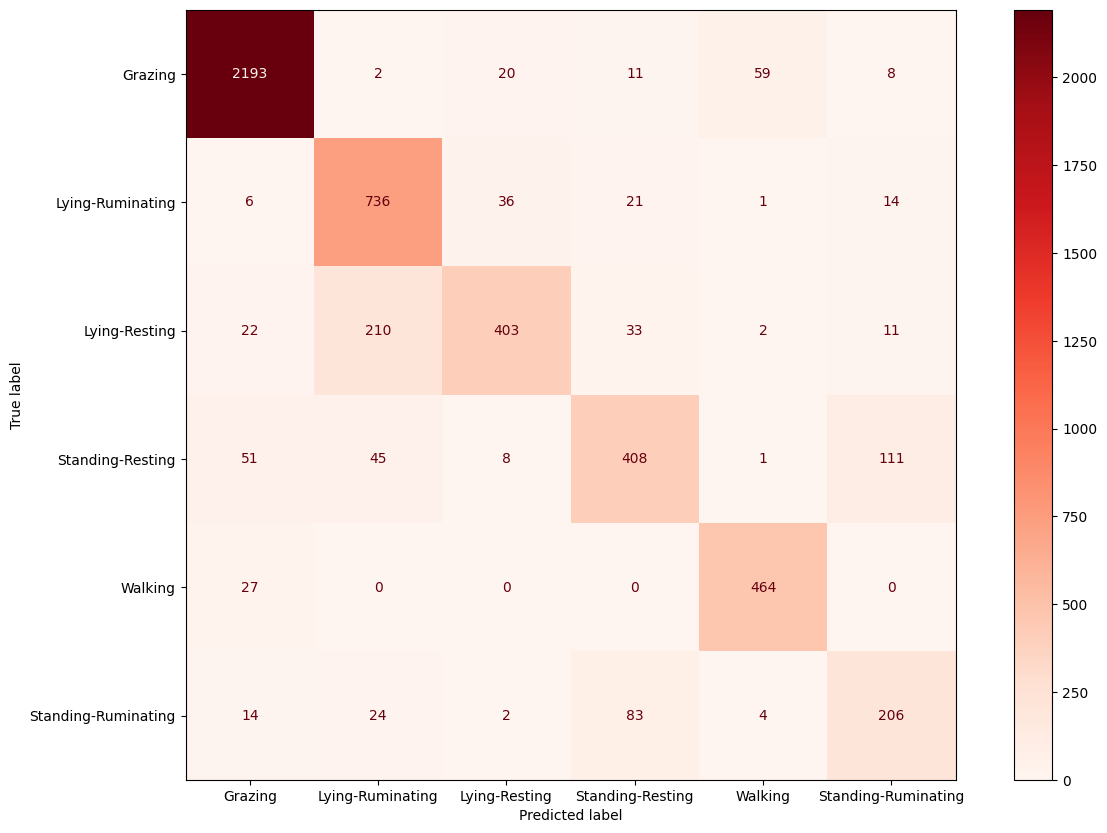

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_map)
disp.plot(ax=ax, cmap="Reds", values_format='')

### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9481    0.9564    0.9522      2293
   Lying-Ruminating     0.7237    0.9042    0.8039       814
      Lying-Resting     0.8593    0.5918    0.7009       681
   Standing-Resting     0.7338    0.6538    0.6915       624
            Walking     0.8738    0.9450    0.9080       491
Standing-Ruminating     0.5886    0.6186    0.6032       333

           accuracy                         0.8422      5236
          macro avg     0.7879    0.7783    0.7766      5236
       weighted avg     0.8463    0.8422    0.8391      5236



### Gráfico de métricas

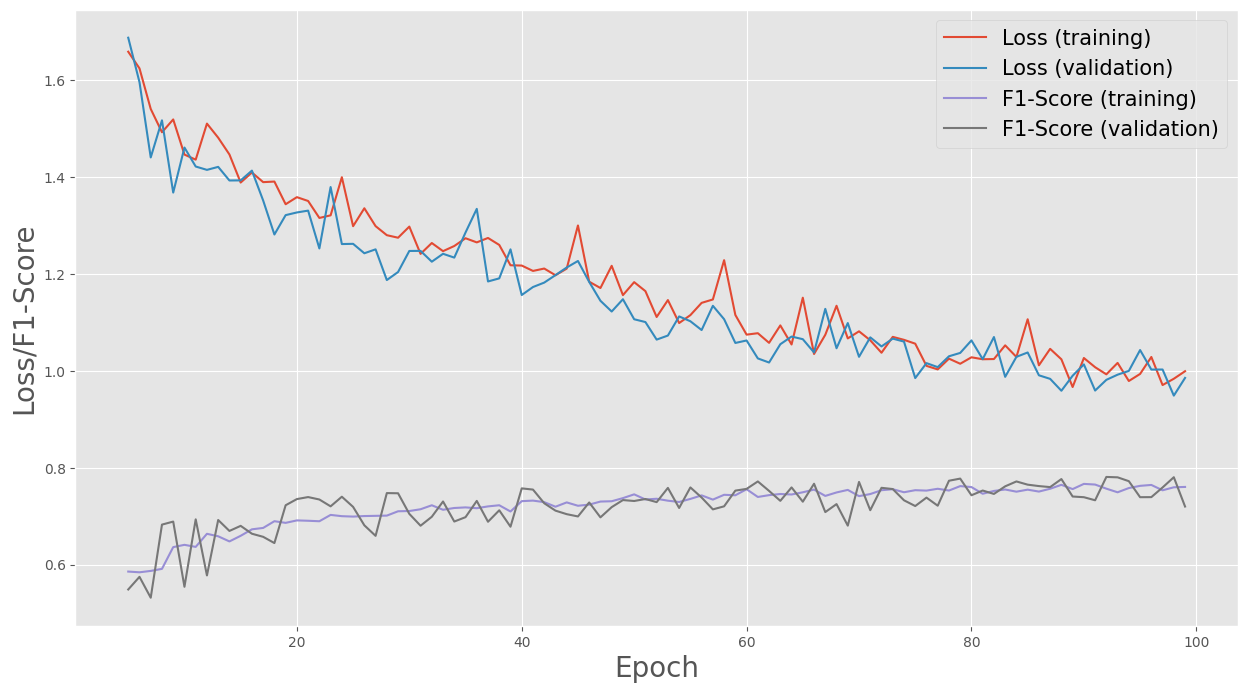

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["val_loss"][5:], label="Loss (validation)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["val_f1_score"][5:], label="F1-Score (validation)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

# CNN OTIMIZADA - BASE DE TREINO COMPLETA

In [ ]:
epochs=100
batch_size=64
input_shape=(1, 10, 1)
n_classes=6
labels_map={"Grazing": 0, "Lying-Ruminating": 1, "Lying-Resting": 2, "Standing-Resting": 3, "Walking": 4, "Standing-Ruminating": 5}

def create_cnn():
    model = Sequential([
        Conv1D(32, kernel_size=10, input_shape=input_shape, activation='relu', padding='same', kernel_initializer=initializers.glorot_uniform(seed=seed)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),
        Dropout(0.2, seed=seed),
        Conv1D(96, kernel_size=5, activation='relu', padding='same', kernel_initializer=initializers.glorot_uniform(seed=seed)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),
        Dropout(0.2, seed=seed),
        Flatten(),
        Dense(384, activation='relu', kernel_regularizer=regularizers.l1(0.01), kernel_initializer=initializers.glorot_uniform(seed=seed)),
        BatchNormalization(),
        Dropout(0.2, seed=seed),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01), kernel_initializer=initializers.glorot_uniform(seed=seed)),
        BatchNormalization(),
        Dropout(0.2, seed=seed),
        Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.01), kernel_initializer=initializers.glorot_uniform(seed=seed))
    ])
    model.reset_metrics()
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc', tfa.metrics.F1Score(num_classes=n_classes, name='f1_score', average='macro')])
    return model

def show_classification_report(results, n_splits):
    print('''\t\t        precision      recall     f1-score\n
        Grazing          {:.2f}        {:.2f}      {:.2f}
        Lying-Ruminating {:.2f}        {:.2f}      {:.2f}
        Standing-Ruminating    {:.2f}        {:.2f}      {:.2f}
        Standing-Resting       {:.2f}        {:.2f}      {:.2f}
        Walking           {:.2f}        {:.2f}      {:.2f}
        Standing-Ruminating    {:.2f}        {:.2f}      {:.2f}
        macro avg         {:.2f}        {:.2f}      {:.2f}
        accuracy          {:.2f}
    '''.format(
        100*results['Grazing']['precision']/n_splits, 100*results['Grazing']['recall']/n_splits, 100*results['Grazing']['f1-score']/n_splits,
        100*results['Lying-Ruminating']['precision']/n_splits, 100*results['Lying-Ruminating']['recall']/n_splits, 100*results['Lying-Ruminating']['f1-score']/n_splits,
        100*results['Standing-Ruminating']['precision']/n_splits, 100*results['Standing-Ruminating']['recall']/n_splits, 100*results['Standing-Ruminating']['f1-score']/n_splits,
        100*results['Standing-Resting']['precision']/n_splits, 100*results['Standing-Resting']['recall']/n_splits, 100*results['Standing-Resting']['f1-score']/n_splits,
        100*results['Walking']['precision']/n_splits, 100*results['Walking']['recall']/n_splits, 100*results['Walking']['f1-score']/n_splits,
        100*results['Standing-Ruminating']['precision']/n_splits, 100*results['Standing-Ruminating']['recall']/n_splits, 100*results['Standing-Ruminating']['f1-score']/n_splits,
        100*results['macro avg']['precision']/n_splits, 100*results['macro avg']['recall']/n_splits, 100*results['macro avg']['f1-score']/n_splits,
        100*results['accuracy']/n_splits
        )
    )

def update_report(results, new_results):
    for k in new_results.keys():
        if type(new_results[k]) is dict:
            for _k in results[k].keys():
                results[k][_k]+=new_results[k][_k]
        else:
            results[k] += new_results[k]
create_cnn().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 1, 10, 32)         352       
                                                                 
 batch_normalization_8 (Batc  (None, 1, 10, 32)        128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 1, 5, 32)          0         
                                                                 
 conv1d_9 (Conv1D)           (None, 1, 5, 96)          15456     
                                                                 
 batch_normalization_9 (Batc  (None, 1, 5, 96)        

## Base original

In [ ]:
# ORIGINAL
cnn_model=create_cnn()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train, c_labels_train, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
123/123 [==============================] - 2s 7ms/step - loss: 36.6626 - acc: 0.6318 - f1_score: 0.5090
Epoch 2/100
123/123 [==============================] - 1s 6ms/step - loss: 4.8343 - acc: 0.6890 - f1_score: 0.5586
Epoch 3/100
123/123 [==============================] - 1s 6ms/step - loss: 2.6311 - acc: 0.7053 - f1_score: 0.5578
Epoch 4/100
123/123 [==============================] - 1s 6ms/step - loss: 1.8869 - acc: 0.7210 - f1_score: 0.5673
Epoch 5/100
123/123 [==============================] - 1s 6ms/step - loss: 1.6460 - acc: 0.7332 - f1_score: 0.5885
Epoch 6/100
123/123 [==============================] - 1s 6ms/step - loss: 1.5443 - acc: 0.7450 - f1_score: 0.6224
Epoch 7/100
123/123 [==============================] - 1s 6ms/step - loss: 1.4910 - acc: 0.7453 - f1_score: 0.6176
Epoch 8/100
123/123 [==============================] - 1s 6ms/step - loss: 1.4657 - acc: 0.7602 - f1_score: 0.6362
Epoch 9/100
123/123 [==============================] - 1s 6ms/step

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2187,5,8,19,72,2
Lying-Ruminating,3,748,52,5,1,5
Lying-Resting,25,195,436,16,1,8
Standing-Resting,44,150,20,354,3,53
Walking,16,0,0,0,475,0
Standing-Ruminating,9,76,1,80,4,163


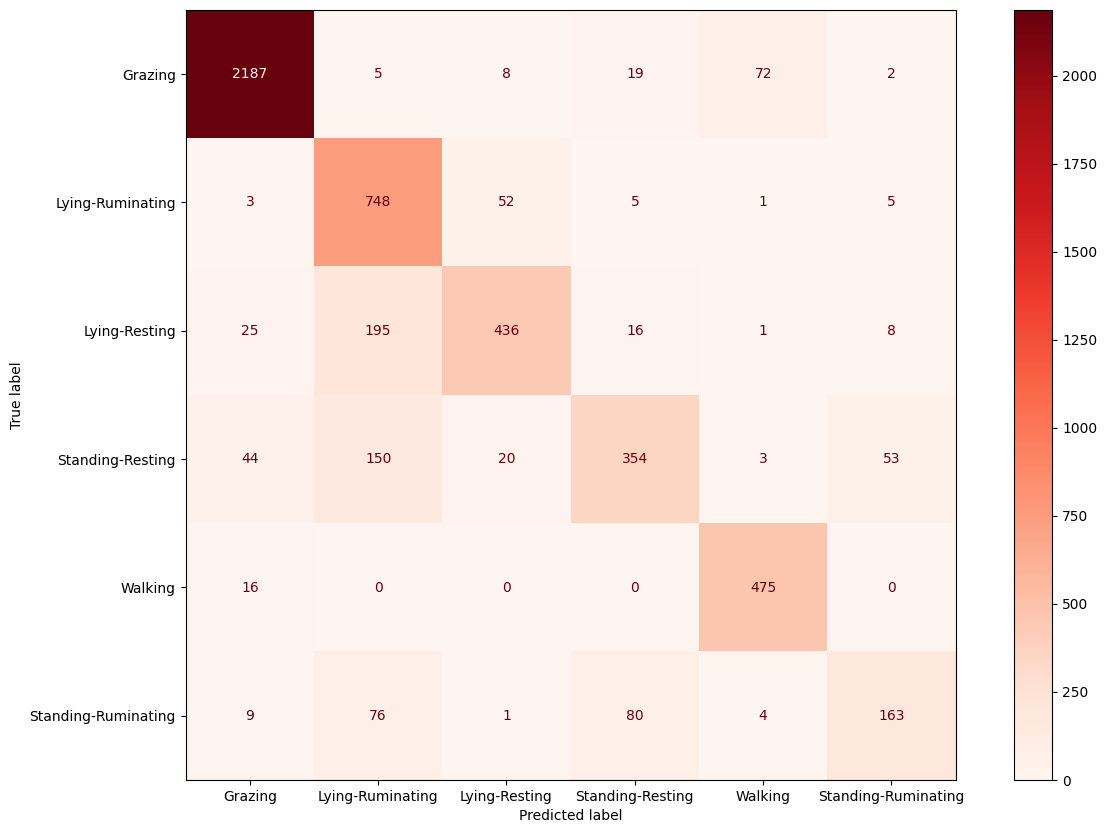

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_map)
disp.plot(ax=ax, cmap="Reds", values_format='')

### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9575    0.9538    0.9556      2293
   Lying-Ruminating     0.6371    0.9189    0.7525       814
      Lying-Resting     0.8433    0.6402    0.7279       681
   Standing-Resting     0.7468    0.5673    0.6448       624
            Walking     0.8543    0.9674    0.9074       491
Standing-Ruminating     0.7056    0.4895    0.5780       333

           accuracy                         0.8333      5236
          macro avg     0.7908    0.7562    0.7610      5236
       weighted avg     0.8421    0.8333    0.8289      5236



### Gráfico de métricas

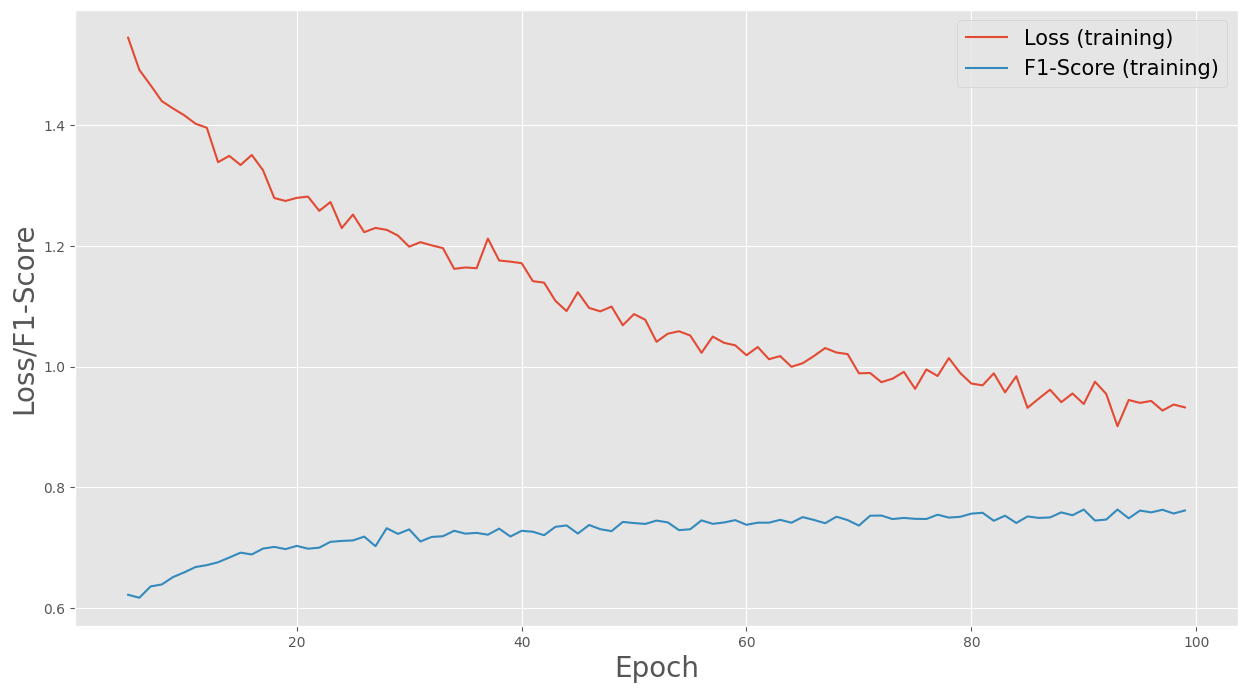

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com Bootstrap

In [ ]:
cnn_model=create_cnn()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_bootstrap, c_labels_train_balanced_bootstrap, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_bootstrap, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_bootstrap, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 3s 6ms/step - loss: 16.5065 - acc: 0.7198 - f1_score: 0.5907
Epoch 2/100
323/323 [==============================] - 2s 6ms/step - loss: 1.7775 - acc: 0.7746 - f1_score: 0.6328
Epoch 3/100
323/323 [==============================] - 2s 6ms/step - loss: 1.3924 - acc: 0.7963 - f1_score: 0.6545
Epoch 4/100
323/323 [==============================] - 2s 6ms/step - loss: 1.2827 - acc: 0.8125 - f1_score: 0.6705
Epoch 5/100
323/323 [==============================] - 2s 6ms/step - loss: 1.2101 - acc: 0.8202 - f1_score: 0.6774
Epoch 6/100
323/323 [==============================] - 2s 6ms/step - loss: 1.1828 - acc: 0.8289 - f1_score: 0.6848
Epoch 7/100
323/323 [==============================] - 2s 6ms/step - loss: 1.1766 - acc: 0.8379 - f1_score: 0.6932
Epoch 8/100
323/323 [==============================] - 2s 6ms/step - loss: 1.1530 - acc: 0.8418 - f1_score: 0.6976
Epoch 9/100
323/323 [==============================] - 2s 6ms/step

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2025,2,0,132,108,26
Lying-Ruminating,1,763,0,29,0,21
Lying-Resting,109,460,0,79,3,30
Standing-Resting,16,42,0,419,4,143
Walking,7,0,0,2,482,0
Standing-Ruminating,4,9,0,43,5,272


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9366    0.8831    0.9091      2293
   Lying-Ruminating     0.5980    0.9373    0.7301       814
      Lying-Resting     0.0000    0.0000    0.0000       681
   Standing-Resting     0.5952    0.6715    0.6310       624
            Walking     0.8007    0.9817    0.8820       491
Standing-Ruminating     0.5528    0.8168    0.6594       333

           accuracy                         0.7565      5236
          macro avg     0.5805    0.7151    0.6353      5236
       weighted avg     0.6843    0.7565    0.7115      5236



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gráfico de métricas

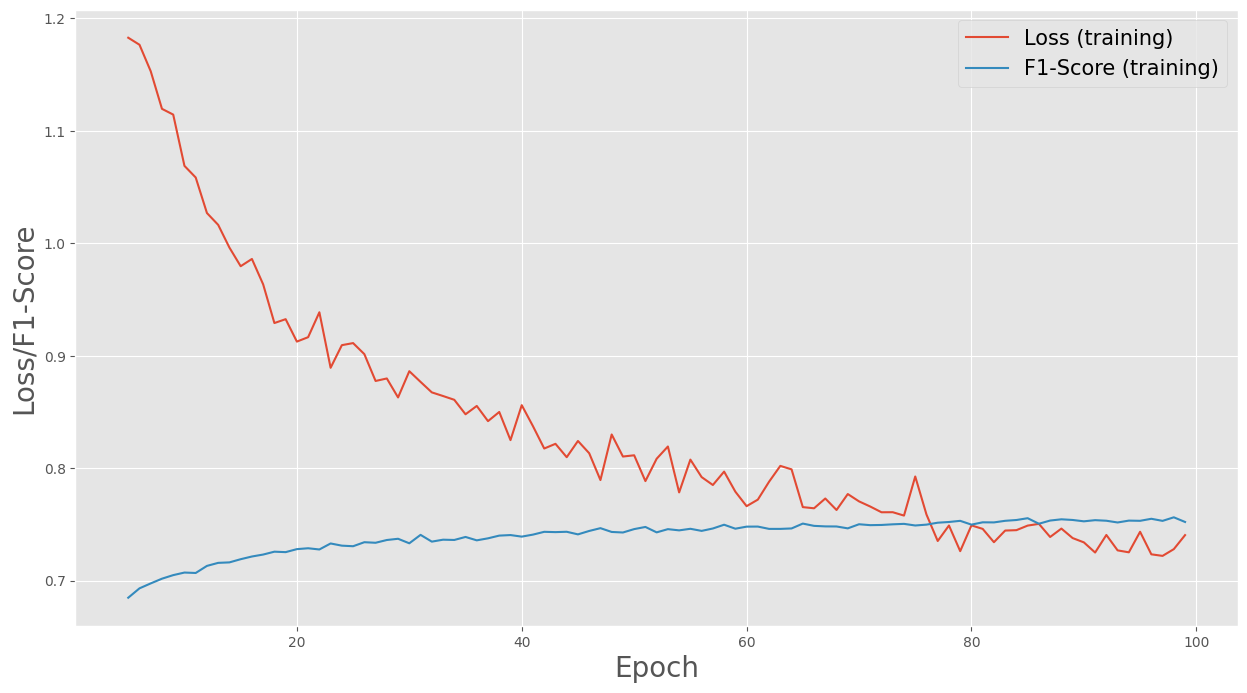

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com SMOTE

In [ ]:
# SMOTE
cnn_model=create_cnn()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_smote, c_labels_train_balanced_smote, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_smote, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_smote, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 3s 6ms/step - loss: 17.3549 - acc: 0.6272 - f1_score: 0.6246
Epoch 2/100
323/323 [==============================] - 2s 6ms/step - loss: 2.0478 - acc: 0.6945 - f1_score: 0.6922
Epoch 3/100
323/323 [==============================] - 2s 6ms/step - loss: 1.6005 - acc: 0.7317 - f1_score: 0.7303
Epoch 4/100
323/323 [==============================] - 2s 6ms/step - loss: 1.5143 - acc: 0.7437 - f1_score: 0.7424
Epoch 5/100
323/323 [==============================] - 2s 6ms/step - loss: 1.4491 - acc: 0.7543 - f1_score: 0.7531
Epoch 6/100
323/323 [==============================] - 2s 6ms/step - loss: 1.4277 - acc: 0.7604 - f1_score: 0.7593
Epoch 7/100
323/323 [==============================] - 2s 6ms/step - loss: 1.4091 - acc: 0.7705 - f1_score: 0.7697
Epoch 8/100
323/323 [==============================] - 2s 6ms/step - loss: 1.3930 - acc: 0.7776 - f1_score: 0.7769
Epoch 9/100
323/323 [==============================] - 2s 6ms/step

### Matrix de confusão

In [ ]:
# matriz de confusao para base balanceada com BOOTSTRAP
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2152,4,9,38,80,10
Lying-Ruminating,6,721,41,33,1,12
Lying-Resting,29,173,428,44,1,6
Standing-Resting,35,24,4,459,3,99
Walking,12,0,0,2,477,0
Standing-Ruminating,11,16,0,77,4,225


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9586    0.9385    0.9484      2293
   Lying-Ruminating     0.7687    0.8857    0.8231       814
      Lying-Resting     0.8880    0.6285    0.7360       681
   Standing-Resting     0.7029    0.7356    0.7189       624
            Walking     0.8428    0.9715    0.9026       491
Standing-Ruminating     0.6392    0.6757    0.6569       333

           accuracy                         0.8522      5236
          macro avg     0.8000    0.8059    0.7976      5236
       weighted avg     0.8582    0.8522    0.8511      5236



### Gráfico de métricas

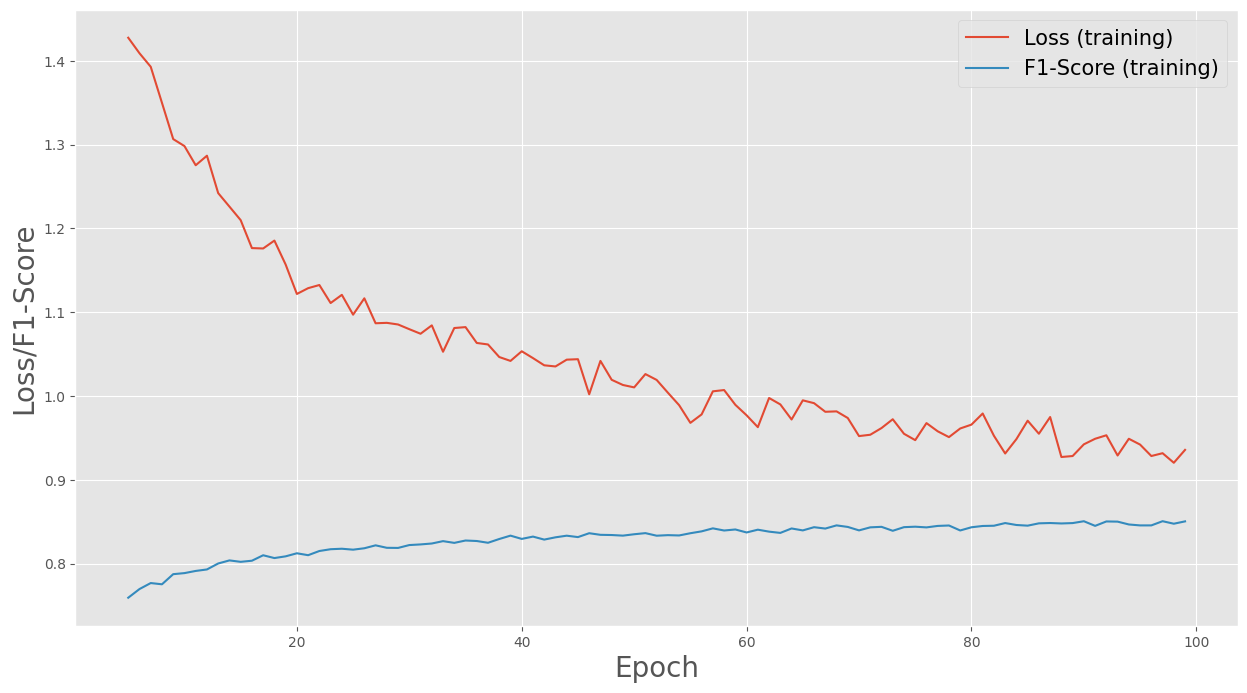

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()